#  NCAA Women's Soccer Tournament

Below is a full exploratory analysis of the data set to understand the NCAA Women's Soccer data set.

Sections include 
 - Conference Analysis
 - At-large bid team profile
 - Possible teams to schedule
 - A record projection calculator
 - Building test data to evaluate predictive models
 - Logistic Regression
 - Simplified Logistic Regression
 - Additional Machine Learning Techniques (mostly unused)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_excel('auto_at_large_conferences.xlsx')
#df.to_csv('auto_at_large_conferences.csv')

In [10]:
df[(df['ADJ RPI']>.58) & (df['Conference_ID']==4) & (df['Year']==2016)]

,Team,Conference_ID,Conference,Non D1 W,Non D1 D,Non D1 L,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Tournament,Year
4,North Carolina,4,Atlantic Coast,0,0,0,17,4,4,0.7600,0.6626,0.5991,0.6643,0.6744,0.6711,0.6800,1,2016
10,Virginia,4,Atlantic Coast,0,0,0,15,5,2,0.7273,0.6366,0.5802,0.5460,0.6389,0.6452,0.6528,1,2016
11,Duke,4,Atlantic Coast,0,0,0,15,5,3,0.7174,0.6450,0.5672,0.5977,0.6428,0.6437,0.6498,1,2016
12,Clemson,4,Atlantic Coast,0,0,0,14,5,4,0.6957,0.6427,0.5782,0.6131,0.6401,0.6398,0.6472,1,2016
14,Florida St.,4,Atlantic Coast,0,0,0,14,4,4,0.7273,0.6141,0.5777,0.5722,0.6309,0.6333,0.6423,2,2016
15,Notre Dame,4,Atlantic Coast,0,0,0,13,3,5,0.7381,0.6145,0.5725,0.6252,0.6381,0.6349,0.6412,1,2016
33,North Carolina St.,4,Atlantic Coast,0,0,0,11,9,2,0.5455,0.6127,0.5651,0.5857,0.5837,0.5840,0.5870,1,2016
37,Virginia Tech,4,Atlantic Coast,0,0,0,11,5,3,0.6579,0.5552,0.5690,0.5865,0.5868,0.5843,0.5843,0,2016


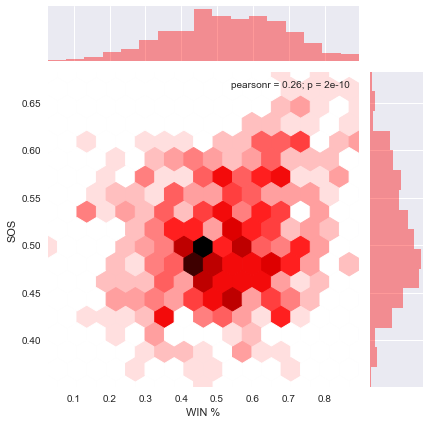

In [4]:
#Density plot of all NCAA Teams comparing Strength of Schedule and Win Percentage, 2015-2016
sns.jointplot(df['WIN %'], df['SOS'], kind='hex', color='red')

# All Conference Descriptions

In [8]:
conference = df.groupby('Conference')
conferences=[]

In [9]:
for name, group in conference:
    conferences.append([name, group['W'].mean(), group['L'].mean(), group['D'].mean(), group['WIN %'].mean(), 
                        group['SOS'].mean(), group['Opp SOS'].mean(), group['Road W'].mean(), group['Road RPI'].mean(),
                        group['RPI'].mean(), group['ADJ RPI'].mean(), len(group[(group['Tournament']>0)])
                       ])

In [10]:
df_conf = pd.DataFrame(conferences, columns=['Conference','W', 'L', 'D', 'WIN %', 'SOS', 'Opp SOS', 'Road W',
       'Road RPI', 'RPI', 'ADJ RPI', 'NCAA Team Count'])

In [19]:
df_conf

,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,NCAA Team Count
0,AAC,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,7
1,America East,8.000000,8.571429,2.357143,0.481315,0.468430,0.469771,0.410036,0.466086,0.471964,0.470550,1
2,Atlantic 10,9.230769,8.500000,2.115385,0.511410,0.500160,0.506354,0.458405,0.500051,0.504522,0.504927,2
3,Atlantic Coast,11.321429,6.892857,2.250000,0.594532,0.591101,0.567982,0.529693,0.581192,0.586176,0.590936,15
4,Atlantic Sun,8.909091,7.727273,1.909091,0.521894,0.460994,0.477737,0.465368,0.480006,0.480369,0.480800,2
5,Big 12,11.166667,7.055556,2.388889,0.588204,0.575977,0.553340,0.558018,0.572722,0.573352,0.577333,8
6,Big East,9.800000,8.100000,1.950000,0.528610,0.539619,0.528980,0.504312,0.531208,0.534181,0.536230,5
7,Big Sky,8.705882,8.470588,2.470588,0.498084,0.466707,0.478148,0.424852,0.472659,0.477406,0.476312,2
8,Big South,9.647059,8.352941,1.529412,0.525350,0.471444,0.471776,0.444466,0.482296,0.484972,0.483906,2
9,Big Ten,10.214286,7.357143,3.000000,0.554201,0.580845,0.561314,0.514109,0.563603,0.569305,0.573389,13


# Conferences that average more than 10 wins per team

In [17]:
df_conf[(df_conf['W']>10)]

,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,NCAA Team Count
0,AAC,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,7
3,Atlantic Coast,11.321429,6.892857,2.250000,0.594532,0.591101,0.567982,0.529693,0.581192,0.586176,0.590936,15
5,Big 12,11.166667,7.055556,2.388889,0.588204,0.575977,0.553340,0.558018,0.572722,0.573352,0.577333,8
9,Big Ten,10.214286,7.357143,3.000000,0.554201,0.580845,0.561314,0.514109,0.563603,0.569305,0.573389,13
22,Pac-12,11.208333,7.541667,1.916667,0.578608,0.580834,0.562826,0.525553,0.571146,0.575768,0.580871,11
24,SEC,10.857143,7.750000,2.071429,0.559024,0.579912,0.560928,0.528194,0.565721,0.569938,0.573368,12


# Conferences that got more than 5 Teams into the NCAA in the past 2 years

In [16]:
df_conf[(df_conf['NCAA Team Count']>5)]

,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,NCAA Team Count
0,AAC,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,7
3,Atlantic Coast,11.321429,6.892857,2.250000,0.594532,0.591101,0.567982,0.529693,0.581192,0.586176,0.590936,15
5,Big 12,11.166667,7.055556,2.388889,0.588204,0.575977,0.553340,0.558018,0.572722,0.573352,0.577333,8
9,Big Ten,10.214286,7.357143,3.000000,0.554201,0.580845,0.561314,0.514109,0.563603,0.569305,0.573389,13
22,Pac-12,11.208333,7.541667,1.916667,0.578608,0.580834,0.562826,0.525553,0.571146,0.575768,0.580871,11
24,SEC,10.857143,7.750000,2.071429,0.559024,0.579912,0.560928,0.528194,0.565721,0.569938,0.573368,12
30,WAC,9.419355,8.483871,2.161290,0.516363,0.509753,0.512644,0.452643,0.506280,0.512121,0.514810,8


# Visual Categorization of variables: Lighter colors are better

In [18]:
df_conf.style.background_gradient(cmap='viridis')

# At Large Team Profile
This is a comparison of what a regular NCAA team looks like vs. what an at-large bid team looks like, in reference to Win % and Strength of Schedule

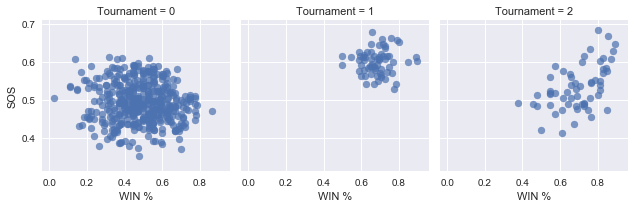

In [29]:
g = sns.FacetGrid(df, col='Tournament')
g.map(plt.scatter, 'WIN %', 'SOS', alpha=.7)

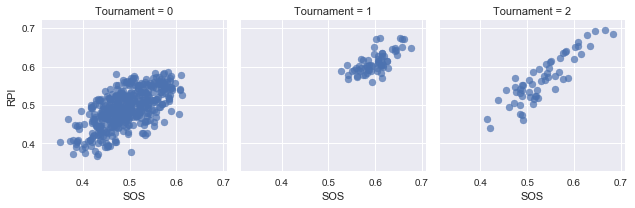

In [30]:
g = sns.FacetGrid(df, col='Tournament')
g.map(plt.scatter, 'SOS', 'RPI', alpha=.7)

In [31]:
at_large = df[(df['Tournament']==1)]
at_large = at_large[['Team', 'W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI', 'Tournament']]

In [32]:
alt = [[at_large['W'].mean(),
at_large['L'].mean(),
at_large['D'].mean(),
at_large['WIN %'].mean(),
at_large['SOS'].mean(),
at_large['Opp SOS'].mean(),
at_large['Road W'].mean(),
at_large['Road RPI'].mean(),
at_large['RPI'].mean(),
at_large['ADJ RPI'].mean()]]

In [33]:
pd.DataFrame(alt,columns=['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI'],index=['At-Large Team'])

,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI
At-Large Team,13.753846,5.6,2.707692,0.683014,0.599298,0.564175,0.58898,0.612179,0.611449,0.617771


From this we learned the difference between a regular NCAA team and a team that makes the NCAA Tournament by receiving
an at-large bid. We also learned in two years, 21 of the 66 teams that received at-large bids had Adjusted RPIs below
.6, our target for success.

# Conference Descriptions

In [34]:
conference = df.groupby('Conference')
conferences=[]
for name, group in conference:
    conferences.append([name, group['W'].mean(), group['L'].mean(), group['D'].mean(), group['WIN %'].mean(), 
                        group['SOS'].mean(), group['Opp SOS'].mean(), group['Road W'].mean(), group['Road RPI'].mean(),
                        group['RPI'].mean(), group['ADJ RPI'].mean(), len(group[(group['Tournament']>0)])
                       ])
df_conf = pd.DataFrame(conferences, columns=['Conference','W', 'L', 'D', 'WIN %', 'SOS', 'Opp SOS', 'Road W',
       'Road RPI', 'RPI', 'ADJ RPI', 'NCAA Team Count'])
df_conf.head()

,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,NCAA Team Count
0,AAC,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,7
1,America East,8.000000,8.571429,2.357143,0.481315,0.468430,0.469771,0.410036,0.466086,0.471964,0.470550,1
2,Atlantic 10,9.230769,8.500000,2.115385,0.511410,0.500160,0.506354,0.458405,0.500051,0.504522,0.504927,2
3,Atlantic Coast,11.321429,6.892857,2.250000,0.594532,0.591101,0.567982,0.529693,0.581192,0.586176,0.590936,15
4,Atlantic Sun,8.909091,7.727273,1.909091,0.521894,0.460994,0.477737,0.465368,0.480006,0.480369,0.480800,2


In [35]:
# Conferences with teams averaging 10 wins or more
df_conf[(df_conf['W']>10)]

,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,NCAA Team Count
0,AAC,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,7
3,Atlantic Coast,11.321429,6.892857,2.250000,0.594532,0.591101,0.567982,0.529693,0.581192,0.586176,0.590936,15
5,Big 12,11.166667,7.055556,2.388889,0.588204,0.575977,0.553340,0.558018,0.572722,0.573352,0.577333,8
9,Big Ten,10.214286,7.357143,3.000000,0.554201,0.580845,0.561314,0.514109,0.563603,0.569305,0.573389,13
22,Pac-12,11.208333,7.541667,1.916667,0.578608,0.580834,0.562826,0.525553,0.571146,0.575768,0.580871,11
24,SEC,10.857143,7.750000,2.071429,0.559024,0.579912,0.560928,0.528194,0.565721,0.569938,0.573368,12


In [36]:
# Conferences that have sent 5 or more teams to the NCAA Tournament in 2015 & 2016
df_conf[(df_conf['NCAA Team Count']>5)]

,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,NCAA Team Count
0,AAC,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,7
3,Atlantic Coast,11.321429,6.892857,2.250000,0.594532,0.591101,0.567982,0.529693,0.581192,0.586176,0.590936,15
5,Big 12,11.166667,7.055556,2.388889,0.588204,0.575977,0.553340,0.558018,0.572722,0.573352,0.577333,8
9,Big Ten,10.214286,7.357143,3.000000,0.554201,0.580845,0.561314,0.514109,0.563603,0.569305,0.573389,13
22,Pac-12,11.208333,7.541667,1.916667,0.578608,0.580834,0.562826,0.525553,0.571146,0.575768,0.580871,11
24,SEC,10.857143,7.750000,2.071429,0.559024,0.579912,0.560928,0.528194,0.565721,0.569938,0.573368,12
30,WAC,9.419355,8.483871,2.161290,0.516363,0.509753,0.512644,0.452643,0.506280,0.512121,0.514810,8


# Possible Teams to Schedule
Below are three tiers of teams I believe are prime candidates for scheduling. These teams are categorized into approximate RPI Ranking ranges of 1-40, 41-80, and 81-120. Different results against these types of teams may lead to different bonuses or penalties in the final Adjusted RPI ranking. To read more on Bonuses or Penalties, please click on the following link and scroll down to the 'Adjusted RPI' section: https://sites.google.com/site/rpifordivisioniwomenssoccer/rpi-formula

In [37]:
# Tier 1- Teams ranked approximately 1-40 by RPI
# teams with RPI values .58 & higher
the_best = []
for i, j in conference:
    conf_team = j.groupby('Team')
    for name, group in conf_team:
        if group['RPI'].sum()/2 > .58:
            if group['Conference_ID'].mean() not in {1,4,6,10,21,23}:
                the_best.append(group)
                
the_best_non_conf = []
for team in the_best:
    if team['Conference_ID'].mean() not in {1,4,6,10,21,23}:
        the_best_non_conf.append([team['Team'].unique()[0], team['ADJ RPI'].mean(),team['Conference'].unique()[0]])
tier1_schedule = pd.DataFrame(the_best_non_conf, columns=["School Name", 'ADJ RPI', 'Conference'])

# Tier 2- Teams ranked approximately 41-80 by RPI 
# Teams with RPI Value between .55-.58

second_best = []
for i, j in conference:
    conf_team = j.groupby('Team')
    for name, group in conf_team:
        if group['RPI'].sum()/2 > .55 and group['RPI'].sum()/2 < .58:
            if group['Conference_ID'].mean() not in {1,4,6,10,21,23}:
                second_best.append(group)
                
second_best_non_conf = []
for team in second_best:
    if team['Conference_ID'].mean() not in {1,4,6,10,21,23}:
        second_best_non_conf.append([team['Team'].unique()[0], team['ADJ RPI'].mean(), team['Conference'].unique()[0]])
tier2_schedule = pd.DataFrame(second_best_non_conf, columns=["School Name", 'ADJ RPI', 'Conference'])

# Tier 3- Teams ranked approximately 81-120 by RPI 
# Teams with Adjusted RPI values between .5-.55

third_best_conf_teams = []
for i, j in conference:
    conf_team = j.groupby('Team')
    for name, group in conf_team:
        if group['RPI'].sum()/2 > .50 and group['RPI'].sum()/2 < .55:
            if group['Conference_ID'].mean() not in {1,4,6,10,21,23}:
                third_best_conf_teams.append(group)

third_non_conf = []
for team in third_best_conf_teams:
    if team['Conference_ID'].mean() not in {1,4,6,10,21,23}:
        third_non_conf.append([team['Team'].unique()[0], team['ADJ RPI'].mean(), team['Conference'].unique()[0]])
tier3_schedule = pd.DataFrame(third_non_conf, columns=["School Name", 'ADJ RPI', 'Conference'])

In [38]:
tier1_schedule.sort_values('ADJ RPI', ascending=False)

,School Name,ADJ RPI,Conference
3,BYU,0.63890,WAC
0,Georgetown,0.63165,Big East
4,Santa Clara,0.61435,WAC
2,South Ala.,0.60170,Sun Belt
1,Princeton,0.59440,Ivy League


In [39]:
tier2_schedule.sort_values('ADJ RPI', ascending=False)

,School Name,ADJ RPI,Conference
12,North Texas,0.57950,Conference USA
7,Long Beach St.,0.57885,Big West
2,Marquette,0.57585,Big East
4,St. John's (NY),0.57215,Big East
16,Samford,0.56920,Southern
8,Hofstra,0.56760,Colonial
10,UNCW,0.56595,Colonial
1,DePaul,0.56495,Big East
13,Harvard,0.56435,Ivy League
9,Northeastern,0.56300,Colonial


In [24]:
tier3_schedule.sort_values('ADJ RPI', ascending=False)

,School Name,ADJ RPI,Conference
5,Saint Joseph's,0.54965,Atlantic 10
53,Seattle,0.54910,WAC
21,James Madison,0.54905,Colonial
27,Rice,0.54850,Conference USA
49,Pepperdine,0.54800,WAC
39,Kent St.,0.54575,Mid-American
44,Bucknell,0.54470,Patriot
36,Monmouth,0.54165,Metro Atlantic
31,Brown,0.54160,Ivy League
9,Butler,0.53940,Big East


# American Conference Profile

In [19]:
american = df[(df['Conference']=='AAC')]
a = american.describe().transpose()
america = a.drop('count', axis=1)
america = america.transpose()
america.drop('Year', axis=1)

,Conference_ID,Non D1 W,Non D1 D,Non D1 L,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Tournament
mean,1.0,0.052632,0.0,0.0,10.789474,7.105263,2.000000,0.579973,0.553012,0.537021,0.513348,0.552583,0.555733,0.557395,0.473684
std,0.0,0.229416,0.0,0.0,4.353529,2.826359,1.333333,0.170411,0.038515,0.014662,0.101179,0.060903,0.053329,0.054978,0.696692
min,1.0,0.000000,0.0,0.0,4.000000,3.000000,0.000000,0.235398,0.466500,0.508000,0.286525,0.432623,0.456900,0.456900,0.000000
25%,1.0,0.000000,0.0,0.0,8.000000,5.000000,1.000000,0.459415,0.527599,0.527728,0.463699,0.529196,0.537800,0.538000,0.000000
50%,1.0,0.000000,0.0,0.0,12.000000,7.000000,2.000000,0.636400,0.554300,0.538512,0.516000,0.553300,0.558300,0.558300,0.000000
75%,1.0,0.000000,0.0,0.0,13.000000,9.000000,3.000000,0.684200,0.585529,0.542257,0.581700,0.589750,0.591165,0.593700,1.000000
max,1.0,1.000000,0.0,0.0,19.000000,13.000000,5.000000,0.847800,0.605716,0.567884,0.682480,0.648390,0.637120,0.642100,2.000000


In [20]:
# Values calculated for UC's 2017 projections

# The average strength of schedule of American Conference Teams in the past 2 years
american['SOS'].mean()

# The average strength of schedule of American Conference Team's opponents in the past 2 years
american['Opp SOS'].mean()

0.53702116315789472

In [21]:
# This will determine the 'magic number' for Win % UC needs 
# to shoot for in order to get an at-large bid
d_wp = (((american['SOS'].mean() * .5) + (american['Opp SOS'].mean() * .25))-.6)/-.25
d_wp

0.75695467894736845

In order for UC to get into the NCAA tournament with our historical Strength Of Schedule and Opponent's Strength of Schedule, we will need to win <bold>75.695%</bold> of our games.

# 2017 Record Projection
2017 Projection for UC Women's soccer with a 12-4-3 Record.
I assumed .07 drop for road win & manually adjusted + .01 (based on others' results).

In [22]:
# UC 2017 Record
w = 12
d = 3
l = 4

In [23]:
# SOS calculations, half of it needs to be Nonconference (calculated below) and half needs to be conference

teams = ['Buffalo', 'Boston', 'Miami', 'Pittsburgh', 
 'Northwestern', 'Purdue', 'Oakland', 
 'Northern Kentucky', 'Xavier', 'Morehead St.']
avg = []
for team in teams:
    mean_avg = df[(df['Team']==str(team))]['WIN %'].mean()
    avg.append(mean_avg)
    
Boston = (0.452400 + 0.659172) /2
avg[1] = Boston
avg_win = 0
for i in avg:
    avg_win +=i
avg_win=avg_win/len(avg)
sos = (avg_win + 0.5530)/2

In [24]:
# calculations
win_per = (w + (.5* d))/(w + d + l)
opp_sos = american['Opp SOS'].mean()
road_w = win_per - .07
road_rpi = (.25 * road_w) + (.5 * sos) + (.25 * opp_sos)
rpi = (win_per* .25)+ (.5 * sos) + (.25 * opp_sos)
adj_rpi = .01 + rpi
#adding in tournament variable for any regression necessary
tourney = 1

In [25]:
# 2017 Projection for UC Women's soccer, assumed .07 drop for road win & manually adjusted + .01 
uc_2017_data = [
['Cincinnati',1,'AAC',0,0,0,w,l,d,win_per,sos,opp_sos,road_w,road_rpi,rpi,adj_rpi,tourney,2017
]]
UC_2017 = pd.DataFrame(data = uc_2017_data,
                       columns=['Team','Conference_ID','Conference','Non D1 W','Non D1 D','Non D1 L','W', 'L', 'D', 'WIN %',
                                'SOS', 'Opp SOS', 'Road W','Road RPI', 'RPI',
                                'ADJ RPI', 'Tournament','Year'])

# Numerical data used for Regression
UC_2017_regr = UC_2017[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI', 'Tournament']]

# Midpoint Takeaways

If historical averages of American Strength of Schedule and Opponents' Strength of Schedule remain constant, our 2017 projected record of 12-4-3 is correct , UC will return an RPI of .5823 (Red Line Below), below the targeted 'safe zone' of .6 (Dashed Green Line Below), but high enough to be a strong candidate for the tournament.

In [26]:
win_per

0.7105263157894737

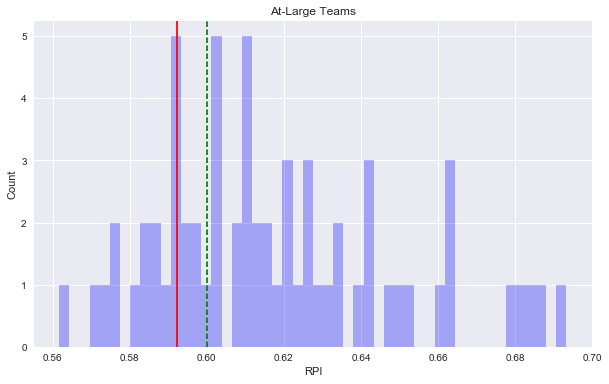

In [27]:
fig = plt.figure(figsize=(10,6))
plt.hist(at_large['ADJ RPI'], bins = 50, color='blue', alpha=.3)
plt.xlabel('RPI')
plt.ylabel('Count')
plt.title('At-Large Teams')
plt.axvline(adj_rpi, color='r')
plt.axvline(.6, color='g', linestyle='dashed')

If the UC Women's team ends with a 13-3-3 record, they will have a winning percentage of 76.3%. If UC achieves a 76.3% winning percentage it will move from a team that will be on the fringe (red line below) to (extremely likely) getting into the tournament (yellow line below).

In [28]:
w1 = 13
d1 = 3
l1 = 3
win_per1 = (w1 + (.5* d1))/(w1 + d1 + l1)
sos1 = sos
opp_sos1 = american['Opp SOS'].mean()
road_w1 = win_per1 - .07
road_rpi1 = (.25 * road_w1) + (.5 * sos1) + (.25 * opp_sos1)
rpi1 = (win_per1* .25)+ (.5 * sos1) + (.25 * opp_sos1)
adj_rpi1 = .01 + rpi1
tourney1 = tourney
uc_2017_data1 = [
['Cincinnati',1,'AAC',0,0,0,w1,l1,d1,win_per1,sos1,opp_sos1,road_w1,road_rpi1,rpi1,adj_rpi1,tourney1,2017
]]
UC_2017_W = pd.DataFrame(data = uc_2017_data1,
                       columns=['Team','Conference_ID','Conference','Non D1 W','Non D1 D','Non D1 L','W', 'L', 'D', 'WIN %',
                                'SOS', 'Opp SOS', 'Road W','Road RPI', 'RPI',
                                'ADJ RPI', 'Tournament','Year'])

In [29]:
# 2017 Projection for UC Women's soccer, assumed .07 drop for road win & manually adjusted + .01 

UC_2017_W

,Team,Conference_ID,Conference,Non D1 W,Non D1 D,Non D1 L,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Tournament,Year
0,Cincinnati,1,AAC,0,0,0,13,3,3,0.763158,0.540973,0.537021,0.693158,0.578031,0.595531,0.605531,1,2017


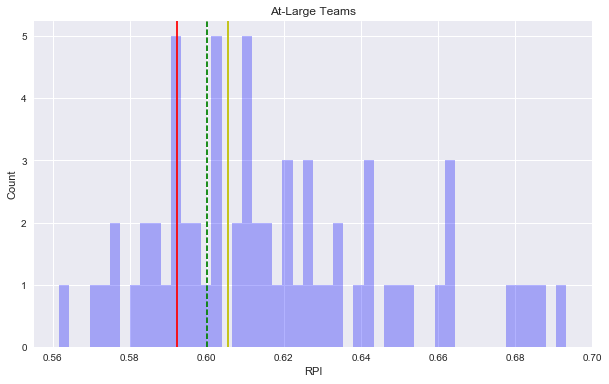

In [30]:
fig = plt.figure(figsize=(10,6))
plt.hist(at_large['ADJ RPI'], bins = 50, color='blue', alpha=.3)
plt.xlabel('RPI')
plt.ylabel('Count')
plt.title('At-Large Teams')
plt.axvline(UC_2017['ADJ RPI'].mean(), color='r')
plt.axvline(.6, color='g', linestyle='dashed')
plt.axvline(UC_2017_W['ADJ RPI'].mean(), color='y')

# Building the Test Data

In order to best test our prediction models, we need to build some test data to see what kinds of factors are most important. Because the raw data is skewed towards teams that DIDN'T make the tournament, we build a test set to see how it fares with most teams actually getting into the tournament. 

The test data comes in 3 parts: 
1. Tier 1: Teams that SHOULD make it in based on RPI. Their wins are calculated by grabbing the conference's top wins, fewest losses, and fewest draws
2. Tier 2: Teams that MIGHT make it in based on RPI. Their wins are the average of the conference's top wins and the mean wins to put them about the 75th percentile of the conference. Their losses are in the 25th percentile of the conference and draws are as well. 
3. Tier 3: Teams that have the fewest wins, most draws, and most losses in their conference.


In [31]:
import math

In [32]:
conference = df.groupby('Conference')
conferences=[]

In [33]:
for name, group in conference:
    conferences.append([name, group['W'].mean(), group['L'].mean(), group['D'].mean(), group['WIN %'].mean(), 
                        group['SOS'].mean(), group['Opp SOS'].mean(), group['Road W'].mean(), group['Road RPI'].mean(),
                        group['RPI'].mean(), group['ADJ RPI'].mean(), len(group[(group['Tournament']>0)])
                       ])

In [34]:
test_builder = []

In [35]:
import random

In [74]:
def rpi_maker(conference_id):
    for i in range(0,3):
        conference_name = df[(df['Conference_ID']==int(conference_id))]['Conference'].unique()[0]
        team_name = conference_name + "_" + str(i)
        #top team, find top wins, fewest losses, average draws
        if i ==0:
            w = df[(df['Conference_ID']==int(conference_id))]['W'].max()
            l = df[(df['Conference_ID']==int(conference_id))]['L'].min()
            d = df[(df['Conference_ID']==int(conference_id))]['D'].min()
            tournament = 1
        #middle team, 75th percentile in W, L, D
        elif i ==1:
            w = math.ceil(math.ceil(df_conf[(df_conf['Conference']==conference_name)]['W'])+ (df[(df['Conference_ID']==int(conference_id))]['W'].max())/2)
            l = math.ceil(math.ceil(df_conf[(df_conf['Conference']==conference_name)]['L'] + df[(df['Conference_ID']==int(conference_id))]['L'].min())/2)
            d = math.ceil(math.ceil(df_conf[(df_conf['Conference']==conference_name)]['D'] + df[(df['Conference_ID']==int(conference_id))]['D'].mean())/2)
            tournament = 1
        #worst team
        else:
            w = math.ceil(math.ceil(df_conf[(df_conf['Conference']==conference_name)]['W'])+ (df[(df['Conference_ID']==int(conference_id))]['W'].min())/2)
            l = math.ceil(math.ceil(df_conf[(df_conf['Conference']==conference_name)]['L'] + df[(df['Conference_ID']==int(conference_id))]['L'].max())/2)
            d = math.ceil(math.ceil(df_conf[(df_conf['Conference']==conference_name)]['D'] + df[(df['Conference_ID']==int(conference_id))]['D'].max())/2)
            tournament = 0
        wp = (w + (.5*d))/(w + l + d)
        sos = df_conf[(df_conf['Conference']==conference_name)]['SOS'].item()
        opp_sos = df_conf[(df_conf['Conference']==conference_name)]['Opp SOS'].item()
        if wp >= .75:
            road_w = wp-.07
        elif wp >= .6:
            road_w = wp-.1
        else:
            road_w = wp -.14
        road_rpi = ((.25*road_w)+(.5*sos)+(.25*opp_sos))
        rpi = ((.25*wp)+(.5*sos)+(.25*opp_sos))
        if rpi > .65:
            adj_rpi = rpi + .02
        elif rpi > .60:
            adj_rpi = rpi + .01
        elif rpi > .55:
            adj_rpi = rpi + .005
        else:
            adj_rpi = rpi + .001
            
        test_builder.append([team_name, conference_id, conference_name, 0,0,0, w, l, d, wp, sos, opp_sos, road_w, road_rpi, rpi, adj_rpi, tournament])
    print(conference_name, ' completed.')

In [75]:
#Non Automatic bid data only:
df_at_large = df[df.Tournament !=2]

In [76]:
for i in df_at_large['Conference_ID'].unique():
    rpi_maker(i)

Pac-12  completed.
SEC  completed.
Atlantic Coast  completed.
Big 12  completed.
Big Ten  completed.
WAC  completed.
Big East  completed.
AAC  completed.
Ivy League  completed.
Atlantic 10  completed.
Conference USA  completed.
Mid-American  completed.
Big West  completed.
Atlantic Sun  completed.
Sun Belt  completed.
Southland  completed.
OVC  completed.
Mountain West  completed.
Colonial  completed.
Big South  completed.
Missouri Valley  completed.
America East  completed.
Horizon  completed.
Patriot  completed.
Southern  completed.
Big Sky  completed.
Summit League  completed.
Metro Atlantic  completed.
Independent  completed.
Northeast  completed.
Southwestern  completed.


In [77]:
test_df = pd.DataFrame(test_builder, columns=['Team', 'Conference_ID', 'Conference','Non D1 W','Non D1 L','Non D1 D','W', 'L', 'D', 'WIN %', 'SOS', 'Opp SOS', 'Road W',
       'Road RPI', 'RPI', 'ADJ RPI', 'Tournament'])

In [78]:
len(test_builder)

186

In [79]:
test_df.to_csv('test_data.csv')


In [80]:
test_df.head()

,Team,Conference_ID,Conference,Non D1 W,Non D1 L,Non D1 D,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Tournament
0,Pac-12_0,21,Pac-12,0,0,0,19,2,0,0.904762,0.580834,0.562826,0.834762,0.639814,0.657314,0.677314,1
1,Pac-12_1,21,Pac-12,0,0,0,22,5,2,0.793103,0.580834,0.562826,0.723103,0.611899,0.629399,0.639399,1
2,Pac-12_2,21,Pac-12,0,0,0,15,11,4,0.566667,0.580834,0.562826,0.426667,0.537790,0.572790,0.577790,0
3,SEC_0,23,SEC,0,0,0,21,2,0,0.913043,0.579912,0.560928,0.843043,0.640949,0.658449,0.678449,1
4,SEC_1,23,SEC,0,0,0,22,5,3,0.783333,0.579912,0.560928,0.713333,0.608521,0.626021,0.636021,1


# Logistic Regression Fit

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [339]:
X = df_at_large[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
y = df_at_large[['Tournament']]
mod = sm.OLS(y,X) # describe the model
res = mod.fit()   # fit the model
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Tournament   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     85.65
Date:                Wed, 08 Mar 2017   Prob (F-statistic):          6.87e-102
Time:                        22:24:32   Log-Likelihood:                 57.026
No. Observations:                 513   AIC:                            -94.05
Df Residuals:                     503   BIC:                            -51.65
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W              0.1123      0.011      9.762      0.0

In [310]:
df_adj = df[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI','Tournament']]

In [311]:
df_adj['Tournament'].replace(2,1, inplace=True)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [331]:
X_adj = df_adj[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
y_adj = df_adj[['Tournament']]

In [316]:
model_adj = sm.OLS(y_adj, X_adj)
b = model_adj.fit()
print(b.summary())

                            OLS Regression Results                            
Dep. Variable:             Tournament   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 08 Mar 2017   Prob (F-statistic):          2.46e-124
Time:                        20:46:50   Log-Likelihood:                -66.630
No. Observations:                 572   AIC:                             153.3
Df Residuals:                     562   BIC:                             196.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W              0.1421      0.013     11.193      0.0

In [337]:
def test_models(df):
    df_X = df[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
    df_y = df[['Tournament']]
    for i in df_X.columns:
        model_adj = sm.OLS(df_y, df_X[i])
        b = model_adj.fit()
        print(b.summary())

In [338]:
test_models(df_adj)

                            OLS Regression Results                            
Dep. Variable:             Tournament   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     404.7
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           1.91e-68
Time:                        22:00:34   Log-Likelihood:                -221.15
No. Observations:                 572   AIC:                             444.3
Df Residuals:                     571   BIC:                             448.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W              0.0295      0.001     20.117      0.0

# Machine Learning Techniques
In this section we will attempt to sort the test data into teams that get into the tournament and teams that do not. We will start with categorical logistic regression, then go into K Nearest Neighbors, K Means Clustering, and the Support Vector Machines

In [97]:
# Data Cleanup
#X_train_df_clean = df_at_large[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
#X_test_df_clean = test_df[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
#y_train_df_clean = df_at_large[['Tournament']]
#y_test_df_clean = test_df[['Tournament']]

In [98]:
#from sklearn.linear_model import LogisticRegression

In [99]:
#log = LogisticRegression()

In [100]:
#log.fit(X_train_df_clean, y_train_df_clean)

In [101]:
#predictions = log.predict(X_test_df_clean)

In [102]:
#r2_score(predictions, y_test_df_clean)

In [103]:
#from sklearn.metrics import confusion_matrix, classification_report, r2_score

In [54]:
#print(confusion_matrix(predictions, y_test_df_clean))

[[31 20]
 [ 0 42]]


In [55]:
#print(classification_report(predictions, y_test_df_clean))

             precision    recall  f1-score   support

          0       1.00      0.61      0.76        51
          1       0.68      1.00      0.81        42

avg / total       0.85      0.78      0.78        93



# Logistic Regression on 'Manual' Test Data
The Logistic model performed much better on the test set of data, correctly predicting all true positives and false positives. The next step is to see how it predicts Nate's projected season data. We've put his predictions as a refresher below:

In [88]:

# 2017 Projection for UC Women's soccer, assumed .07 drop for road win & manually adjusted + .01 
'''uc_wp_0 = (12+(.5*3))/(12+3+4)
rpi_2017_proj_0 = ( ( (uc_wp_0)*.25) + ((sos)*.5) + ((american['Opp SOS'].mean())*.25) )
rpi_2017_adj_proj_0 = rpi_2017_proj_0+.01
uc_2017_predicted_finish_0 = ['Cincinnati_0',1,'AAC',0,0,0,12,4,3,uc_wp_0,sos,0.5370,0.6244,0.5668,rpi_2017_proj_0,rpi_2017_adj_proj_0,1]
test_builder.append(uc_2017_predicted_finish_0)'''

In [89]:
'''uc_wp_1 = (13+(.5*3))/(13+3+3)
rpi_2017_proj_1 = ( ( (uc_wp_1)*.25) + ((sos)*.5) + ((american['Opp SOS'].mean())*.25) )
rpi_2017_adj_proj_1 = rpi_2017_proj_1+.01
uc_2017_predicted_finish_1 = ['Cincinnati_0',1,'AAC',0,0,0,12,4,3,uc_wp_1,sos,0.5370,0.6244,0.5668,rpi_2017_proj_1,rpi_2017_adj_proj_1,0]
test_builder.append(uc_2017_predicted_finish_1)'''

In [90]:
'''uc_wp_2 = (14+(.5*4)/(14+4+1))
rpi_2017_proj_2 = (((uc_wp_2)*.25) + ((sos)*.5) + ((american['Opp SOS'].mean())*.25) )
rpi_2017_adj_proj_2 = rpi_2017_proj_2+.01
uc_2017_predicted_finish_2 = ['Cincinnati_0',1,'AAC',0,0,0,12,4,3,uc_wp_2,sos,0.5370,0.6244,0.5668,rpi_2017_proj_2,rpi_2017_adj_proj_2,1]
test_builder.append(uc_2017_predicted_finish_2)'''

In [91]:
'''uc_wp_3 = (15+(.5*4)/(14+4+1))
rpi_2017_proj_3 = (((uc_wp_3)*.25) + ((sos)*.5) + ((american['Opp SOS'].mean())*.25) )
rpi_2017_adj_proj_3 = rpi_2017_proj_3+.01
uc_2017_predicted_finish_3 = ['Cincinnati_0',1,'AAC',0,0,0,12,4,3,uc_wp_3,sos,0.5370,0.6244,0.5668,rpi_2017_proj_3,rpi_2017_adj_proj_3,1]
test_builder.append(uc_2017_predicted_finish_3)'''

In [92]:
'''test_df = pd.DataFrame(test_builder, columns=['Team', 'Conference_ID', 'Conference','Non D1 W','Non D1 L','Non D1 D','W', 'L', 'D', 'WIN %', 'SOS', 'Opp SOS', 'Road W',
       'Road RPI', 'RPI', 'ADJ RPI', 'Tournament'])'''

In [93]:
'''# Data Cleanup - Rerun w/ Nate's Data
X_train_df_clean = df_at_large[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
X_test_df_clean = test_df[['W','L','D','WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
y_train_df_clean = df_at_large[['Tournament']]
y_test_df_clean = test_df[['Tournament']]'''

In [104]:
#log.fit(X_train_df_clean, y_train_df_clean)

In [105]:
#log.fit(X_train_df_clean, y_train_df_clean).coef_

In [106]:
#log.fit(X_train_df_clean, y_train_df_clean).intercept_

In [107]:
#predictions = log.predict(X_test_df_clean)

In [108]:
#predictions

In [100]:
len(test_builder)

97

In [101]:
print(classification_report(predictions, y_test_df_clean))

             precision    recall  f1-score   support

          0       1.00      0.58      0.74        55
          1       0.65      1.00      0.79        42

avg / total       0.85      0.76      0.76        97



In [272]:
# removed UC tests
#del test_builder[-8:-1]

# Narrowing Significance Parameter Selection
Based on what we saw with df_at_large.corr(), Wins, Losses, Win %, Strength of Schedule, RPI, and Adjusted RPI are the most significant variables in this dataset for predicting whether a team receives an At-Large bid to the NCAA tournament

In [57]:
# First log model with just W, Win %, SOS, Opp SOS, RPI, ADJ_RPI
X_train_1 = df_at_large[['W','L','WIN %', 'SOS', 'RPI', 'ADJ RPI']]
y_train_1 = df_at_large[['Tournament']]
X_test_1 = test_df[['W','L','WIN %', 'SOS', 'RPI', 'ADJ RPI']]
y_test_1 = test_df[['Tournament']]

In [58]:
log.fit(X_train_1, y_train_1)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions_1 = log.predict(X_test_1)

In [60]:
print(predictions_1)

[1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]


In [63]:
print(classification_report(predictions_1, y_test_1))
print('\n')
print(confusion_matrix(predictions_1, y_test_1))
print('\n')
print(r2_score(predictions_1, y_test_1))

             precision    recall  f1-score   support

          0       1.00      0.66      0.79        47
          1       0.74      1.00      0.85        46

avg / total       0.87      0.83      0.82        93



[[31 16]
 [ 0 46]]


0.311748381129


[[31 16]
 [ 0 46]]


This model shows better results, jumping from predicting values correctly 68% of the time (fair, not good) to 74% of the time. We are going to narrow this search one more time to Wins, Win Percentage, Strength of Schedule, and Adjusted RPI, based on the heatmap below.

In [109]:
correlations = df_at_large.corr()
correlations.style.background_gradient(cmap='viridis')

In [64]:
X_train_2 = df_at_large[['W','WIN %', 'SOS', 'ADJ RPI']]
y_train_2 = df_at_large[['Tournament']]
X_test_2 = test_df[['W','WIN %', 'SOS', 'ADJ RPI']]
y_test_2 = test_df[['Tournament']]

In [65]:
log.fit(X_train_2, y_train_2)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
predictions_2 = log.predict(X_test_2)

In [68]:
print(classification_report(predictions_2, y_test_2))
print('\n\n')
print(confusion_matrix(predictions_2, y_test_2))
print('\n')
print(r2_score(predictions_2, y_test_2))

             precision    recall  f1-score   support

          0       0.94      0.67      0.78        43
          1       0.77      0.96      0.86        50

avg / total       0.85      0.83      0.82        93




[[29 14]
 [ 2 48]]


0.307906976744


The model improved slightly once again with the removal of the Losses and RPI variables. However, we are going to try to isolate 1-2 Variables that are the best predictors of receiving an at-large bid so we can increase our odds of getting into the tournament. 

Our next 3 models are going to have Wins paired with Strength of Schedule and Adjusted RPI, Win Percentage paired with Strength of Schedule and Adjusted RPI, and both of the above without Adjusted RPI.

In [81]:
X_train_9 = df_at_large[['ADJ RPI']]
y_train_9 = df_at_large[['Tournament']]
X_test_9 = test_df[['ADJ RPI']]
y_test_9 = test_df[['Tournament']]

In [82]:
log.fit(X_train_9,y_train_9)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
predictions_9 = log.predict(X_test_9)

In [84]:
print(classification_report(predictions_9, y_test_9))
print('\n')
print(confusion_matrix(predictions_9, y_test_9))
print('\n')
print(r2_score(predictions_9, y_test_9))

             precision    recall  f1-score   support

          0       1.00      0.33      0.50       186
          1       0.00      0.00      0.00         0

avg / total       1.00      0.33      0.50       186



[[ 62 124]
 [  0   0]]


0.0


/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [110]:
#df_at_large

In [111]:
df_at_large[['W','WIN %', 'SOS', 'ADJ RPI', 'Tournament']].corr().style.background_gradient(cmap='inferno')

In [112]:
#X_train_3 = df_at_large[['W', 'SOS', 'ADJ RPI']]
#y_train_3 = df_at_large[['Tournament']]
#X_test_3 = test_df[['W', 'SOS', 'ADJ RPI']]
#y_test_3 = test_df[['Tournament']]

In [113]:
#log.fit(X_train_3, y_train_3)

In [114]:
#predictions_3 = log.predict(X_test_3)

In [146]:
print(classification_report(predictions_3, y_test_3))
print('\n\n')
print(confusion_matrix(predictions_3, y_test_3))

             precision    recall  f1-score   support

          0       0.94      0.71      0.81        41
          1       0.81      0.96      0.88        52

avg / total       0.86      0.85      0.85        93




[[29 12]
 [ 2 50]]


In [169]:
#X_train_4 = df_at_large[['WIN %', 'SOS', 'ADJ RPI']]
#y_train_4 = df_at_large[['Tournament']]
#X_test_4 = test_df[['WIN %', 'SOS', 'ADJ RPI']]
#y_test_4 = test_df[['Tournament']]

In [168]:
#log.fit(X_train_4, y_train_4)

In [166]:
#predictions_4 = log.predict(X_test_4)

In [207]:
#print(classification_report(predictions_4, y_test_4))
#print('\n\n')
#print(confusion_matrix(predictions_4, y_test_4))

In [155]:
X_train_5 = df_at_large[['W', 'SOS']]
y_train_5 = df_at_large[['Tournament']]
X_test_5 = test_df[['W', 'SOS']]
y_test_5 = test_df[['Tournament']]

In [156]:
log.fit(X_train_5, y_train_5)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
predictions_5 = log.predict(X_test_5)

In [158]:
print(classification_report(predictions_5, y_test_5))
print('\n\n')
print(confusion_matrix(predictions_5, y_test_5))

             precision    recall  f1-score   support

          0       0.94      0.71      0.81        41
          1       0.81      0.96      0.88        52

avg / total       0.86      0.85      0.85        93




[[29 12]
 [ 2 50]]


In [159]:
X_train_6 = df_at_large[['WIN %', 'SOS']]
y_train_6 = df_at_large[['Tournament']]
X_test_6 = test_df[['WIN %', 'SOS']]
y_test_6 = test_df[['Tournament']]

In [164]:
#log.fit(X_train_6, y_train_6)

In [161]:
#predictions_6 = log.predict(X_test_6)

In [163]:
#print(classification_report(predictions_6, y_test_6))
#print('\n\n')
#print(confusion_matrix(predictions_6, y_test_6))

From this we learned that Wins and Strength of Schedule are the best predictors of receiving an At-Large bid. Next we'll see if either variable is more important than the other to determine next steps.

In [177]:
X_train_7 = df_at_large[['W']]
y_train_6 = df_at_large[['Tournament']]
X_test_7 = test_df[['W']]
y_test_6 = test_df[['Tournament']]

In [178]:
log.fit(X_train_7, y_train_6)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
predictions_7 = log.predict(X_test_7)

In [180]:
print(classification_report(predictions_7, y_test_6))
print('\n\n')
print(confusion_matrix(predictions_7, y_test_6))

             precision    recall  f1-score   support

          0       0.94      0.71      0.81        41
          1       0.81      0.96      0.88        52

avg / total       0.86      0.85      0.85        93




[[29 12]
 [ 2 50]]


In [204]:
#X_train_8 = df_at_large[['SOS']]
#y_train_6 = df_at_large[['Tournament']]
#X_test_8 = test_df[['SOS']]
#y_test_6 = test_df[['Tournament']]

In [205]:
#log.fit(X_train_8, y_train_6)

In [206]:
#predictions_8 = log.predict(X_test_8)

In [184]:
#print(classification_report(predictions_8, y_test_6))
#print('\n\n')
#print(confusion_matrix(predictions_8, y_test_6))

             precision    recall  f1-score   support

          0       1.00      0.33      0.50        93
          1       0.00      0.00      0.00         0

avg / total       1.00      0.33      0.50        93




[[31 62]
 [ 0  0]]


/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


This tells us that winning is the single most important factor to getting into the NCAA tournament, with Strength of Schedule Supplementing that factor. This means we need to determine the best way to get wins that will boost our strength of schedule.  

# Decision Tree
In this next categorization technique we'll look at is Decision Trees, which looks at various criteria and sorts them based on the values in the criteria

Findings: This is a very bad model based on the precision and recall- it predicts the correct values between 25-32% of the time.

# Random Forest
The random forest classifier is a more advanced version of the Decision Tree classifier, think of it as multiple decision trees being run at the same time and the aggregate mean of their results is the final result

In [298]:
print(classification_report(rfc_predict, y_test))

             precision    recall  f1-score   support

          0       0.94      0.40      0.56        72
          1       0.32      0.91      0.47        22

avg / total       0.79      0.52      0.54        94



Based on these findings, this is a better model but still a bad model to pursue because it predicts the correct value between 32-40% of the time.

# K Nearest Neighbors

In [114]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import cross_val_score

In [194]:
#knn = KNeighborsClassifier(n_neighbors=5)
#scores = cross_val_score(knn, X_train_df_clean, y_train_df_clean)
#print(scores)

In [195]:
#knn.fit(X_train, y_train)

In [196]:
#knn_predict = knn.predict(X_test)

In [306]:
print(classification_report(knn_predict, y_test))
print("\n")
print(confusion_matrix(knn_predict, y_test))

             precision    recall  f1-score   support

          0       0.81      0.54      0.65        46
          1       0.67      0.88      0.76        48

avg / total       0.74      0.71      0.70        94



[[25 21]
 [ 6 42]]


The K Nearest Neighbors technique renders a much better model than the Decision Tree or Random Forest, however it is slightly less accurate than the Logistic regression

# Support Vector Machines
Think of SVMs as finding "lines of best fit" but instead of finding the line that fits the data, it finds the line that splits the data

In [309]:
#from sklearn.svm import SVC

In [310]:
#svm_model = SVC()

In [311]:
#svm_model.fit(X_train, y_train)

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [312]:
#svm_predict = svm_model.predict(X_test)

In [313]:
print(classification_report(svm_predict, y_test))
print("\n")
print(confusion_matrix(svm_predict, y_test))

             precision    recall  f1-score   support

          0       0.94      0.58      0.72        50
          1       0.67      0.95      0.79        44

avg / total       0.81      0.76      0.75        94



[[29 21]
 [ 2 42]]


So far so good, this is about the same as the Logistic Regression. However, we need to optimize our parameters, which we'll do using GridSearch

In [314]:
#from sklearn.grid_search import GridSearchCV

In [315]:
#param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [197]:
#grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=3)

In [198]:
#grid.fit(X_train, y_train['Tournament'])

In [203]:
#grid.best_params_

In [199]:
#grid.best_estimator_

In [200]:
#grid_predict = grid.predict(X_test)

In [115]:
#print(classification_report(grid_predict, y_test))
#print("\n")
#print(confusion_matrix(grid_predict, y_test))